In [10]:
# 02-torgo-exploration-02

# Author: Błażej Białczak
# Date: May 2025
# Description: Further TORGO Dataset Exploration a.o outliers detection

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
from librosa.display import specshow
import librosa
import pandas as pd
from scipy.io import wavfile

ModuleNotFoundError: No module named 'seaborn'

In [12]:
from dataset_loader import TORGO
import csv_creator

In [13]:
torgo_path = "TORGO" # Adjust as needed
torgo = TORGO(path=torgo_path)

Initialized TORGO dataset with 17635 files.


In [14]:
audio1_path, label1 = torgo[1]
audio1, _ = sf.read(audio1_path)
audio5000_path, label5000 = torgo[5000]
audio5000, _ = sf.read(audio5000_path)

## STFT Visualization

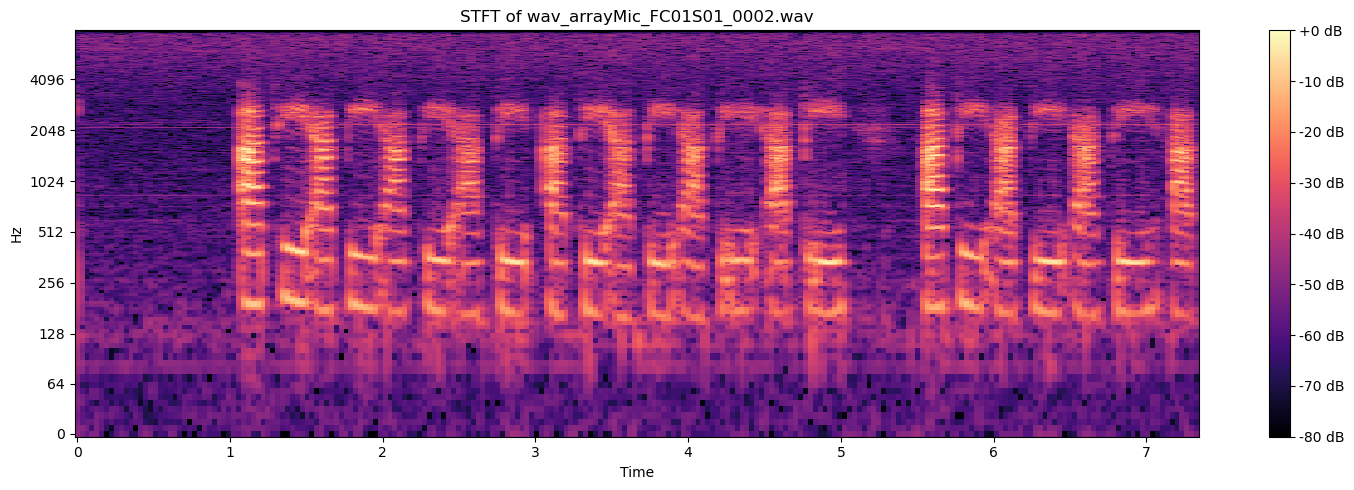

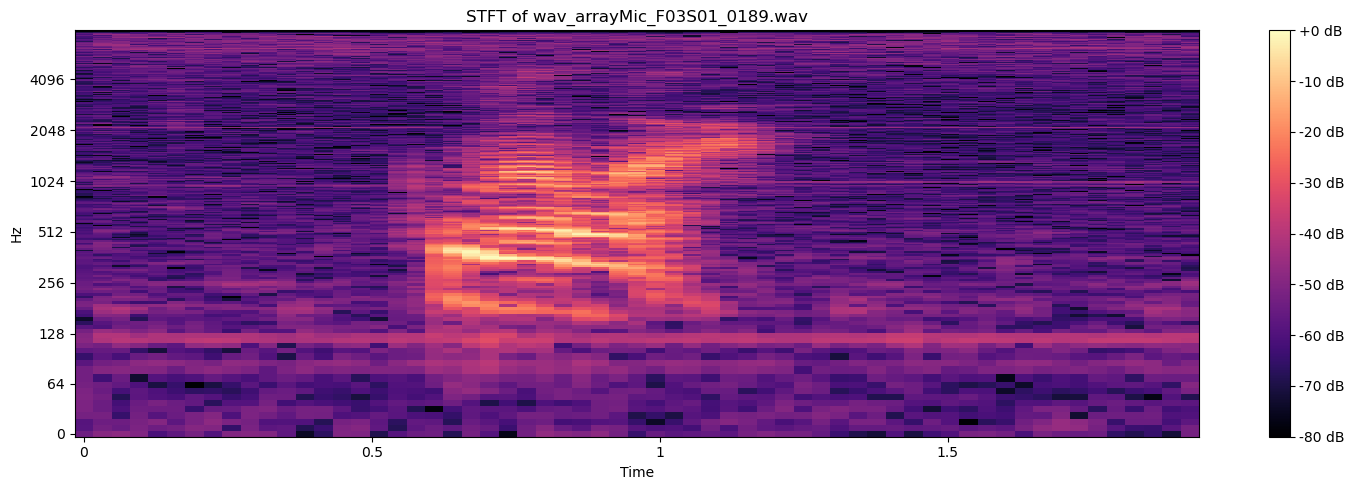

In [15]:
files = [audio1, audio5000]
paths = [audio1_path, audio5000_path]
for file, path in zip(files, paths):
    S = librosa.stft(file, n_fft=2048, hop_length=512)
    S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)
    plt.figure(figsize=(15, 5))
    specshow(S_db, sr=torgo.sample_rate, x_axis='time', y_axis='log', fmax=8000, cmap='magma')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'STFT of {path.split("\\")[-1]}')
    plt.tight_layout()
    plt.show()
    

## Create a CSV database

In [16]:
data = csv_creator.create_csv(torgo_path)

Number of found groups:  4
Number of found sessions in groupF_Con:  11
Could not read TORGO\F_Con\wav_arrayMic_FC01S01\wav_arrayMic_FC01S01_0256.wav: Length is 0
Number of found sessions in groupF_Dys:  11
Could not read TORGO\F_Dys\wav_headMic_F01\wav_headMic_F01_0067.wav: Error opening 'TORGO\\F_Dys\\wav_headMic_F01\\wav_headMic_F01_0067.wav': Format not recognised.
Could not read TORGO\F_Dys\wav_headMic_F01\wav_headMic_F01_0068.wav: Error opening 'TORGO\\F_Dys\\wav_headMic_F01\\wav_headMic_F01_0068.wav': Format not recognised.
Number of found sessions in groupM_Con:  17
Number of found sessions in groupM_Dys:  16


In [27]:
num1= data['target'].value_counts()[1]
num0 = data['target'].value_counts()[0]
print(f"Number of 1s: {num1}")
print(f"Number of 0s: {num0}")

Number of 1s: 6177
Number of 0s: 11455


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17632 entries, 0 to 17631
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   group        17632 non-null  object 
 1   session      17632 non-null  object 
 2   mic          17632 non-null  object 
 3   wav_file     17632 non-null  object 
 4   filepath     17632 non-null  object 
 5   audio_data   17632 non-null  object 
 6   sample_rate  17632 non-null  int64  
 7   length       17632 non-null  float64
 8   target       17632 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 1.2+ MB


In [29]:
data.to_csv("torgo_data.csv", index=False)

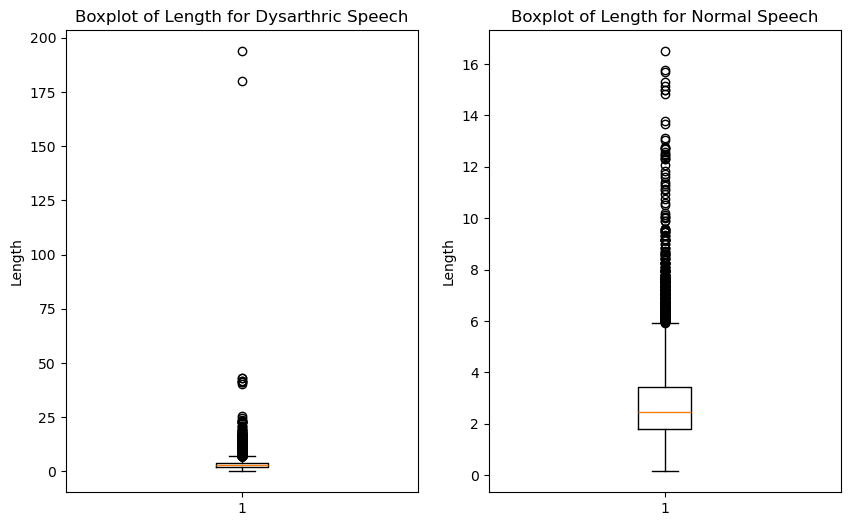

In [33]:
data_dys = data[data['target'] == 1]
data_norm = data[data['target'] == 0]
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(data_dys['length'])
plt.title('Boxplot of Length for Dysarthric Speech')
plt.ylabel('Length')
plt.subplot(1, 2, 2)
plt.boxplot(data_norm['length'])
plt.title('Boxplot of Length for Normal Speech')
plt.ylabel('Length')
plt.show()